--Project Description--
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.)

Problem statement: 
Use machine learning to determine which physiochemical properties make a wine 'good'!

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset has 1,599 rows and 12 columns as shown above. 

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset attributes show the data types of each column with only 'quality' is 'integer' while others are 'floats'

In [6]:
df.shape

(1599, 12)

In [7]:
#To check if there is any column with null value and counts of such null value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The output indicates no null value in any of the columns

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Observations:
1. The dataset shows the mean, Standard deviation, minimum and maximum value of each column as well as lower, median and upper quartile.
2. Each column count is 1599, which indicates there is no missing value from them
3. some columns mean value is slightly greater than medians(50%), this suggests a positive skewness (ie the right tail of the data distribution is longer or contains some unusually high values compared to the left tail.
4. Some columns has maximum value that is significantly higher than the 75th percentile (Q3) ie the difference is more than the 25%(Q1) it suggests presence of outliers (volitile acidity, residue sugar, chloride, free sulfurdoxide and total sulfurdioxide. 

In [9]:
# checking for skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

We observed few variables such as residual sugar , chlorides and sulphates have  high value of skewness. It is an indication that the variables are not evenly distributed, there is need therefore to remove the skewness starting with the highest value(ieresidual sugar)  

In [10]:
#Removing the skewness using cuberoot
df['chlorides'] = np.cbrt(df['chlorides'])

In [11]:
#Removing the skewness using cuberoot
df['residual sugar'] = np.cbrt(df['residual sugar'])

In [12]:
# checking for skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

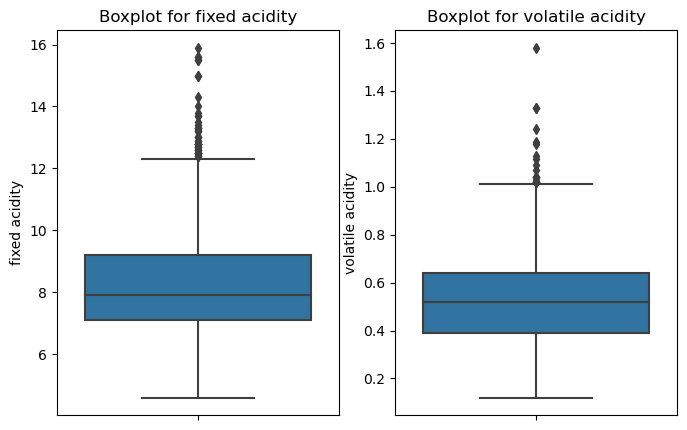

In [13]:
# To visualize the outliers through boxplot

col = ['fixed acidity', 'volatile acidity']

# Create subplots for each column
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

for i, column in enumerate(col, 1):
    plt.subplot(1, len(col), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot for {column}')

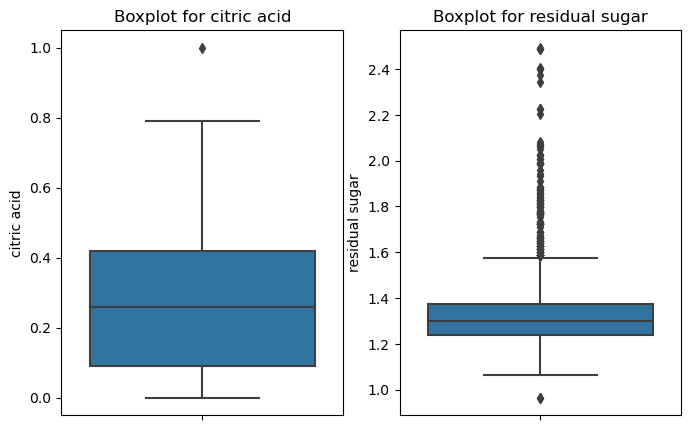

In [14]:
col = ['citric acid', 'residual sugar']
             
# Create subplots for each column
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

for i, column in enumerate(col, 1):
    plt.subplot(1, len(col), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot for {column}')

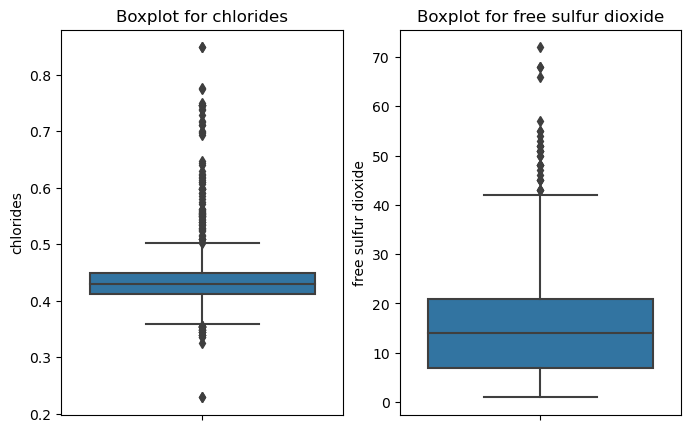

In [15]:
col = ['chlorides', 'free sulfur dioxide']
             
# Create subplots for each column
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

for i, column in enumerate(col, 1):
    plt.subplot(1, len(col), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot for {column}')

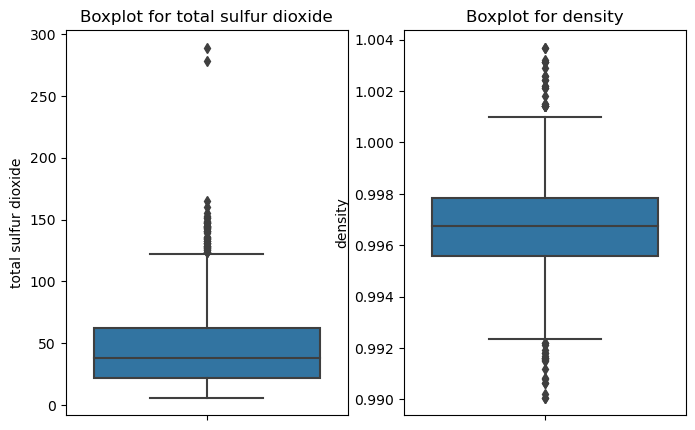

In [16]:
col = ['total sulfur dioxide', 'density']
             
# Create subplots for each column
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

for i, column in enumerate(col, 1):
    plt.subplot(1, len(col), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot for {column}')

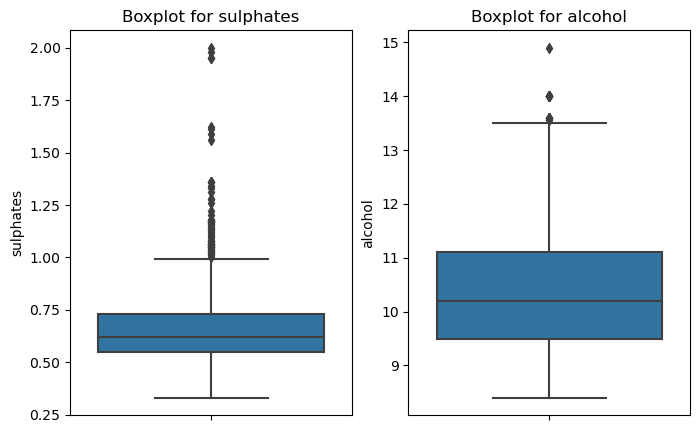

In [17]:
col = ['sulphates', 'alcohol']
             
# Create subplots for each column
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

for i, column in enumerate(col, 1):
    plt.subplot(1, len(col), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot for {column}')

The boxplot validates the observations of outliers in some variables as shown in the describe function earlier

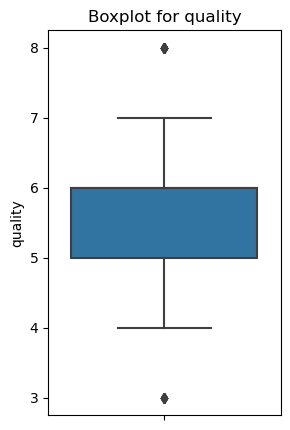

In [18]:
col = ['quality']
             
# Create subplots for each column
plt.figure(figsize=(3, 5))  # Adjust the figure size as needed

for i, column in enumerate(col, 1):
    plt.subplot(1, len(col), i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot for {column}')

In [19]:
# To check the unique values on the target column (ie quality)
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [20]:
#Count the number of target variable
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

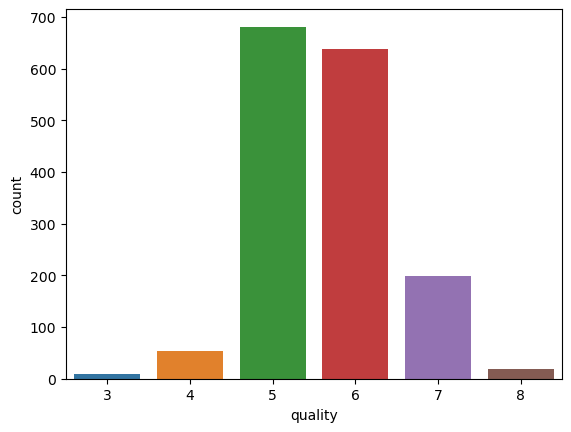

In [21]:
#frequency of target variable
sns.countplot(x='quality', data=df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

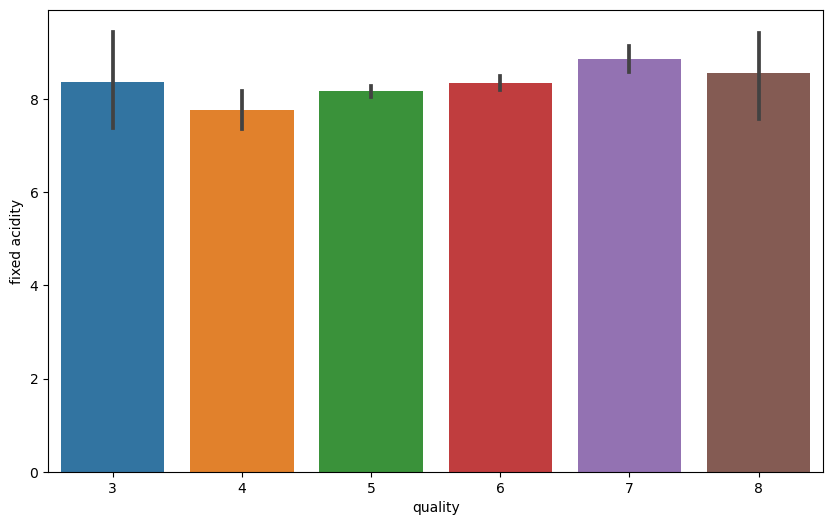

In [22]:
# Create histograms for each variable in realtion to the 'quality' of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

Observation: 
As fixed acidity increases, the quality of wine increases to point 7. it suggests fixed acidity is a strong physiochemical properties that contributes to wine quality.

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='residual sugar'>

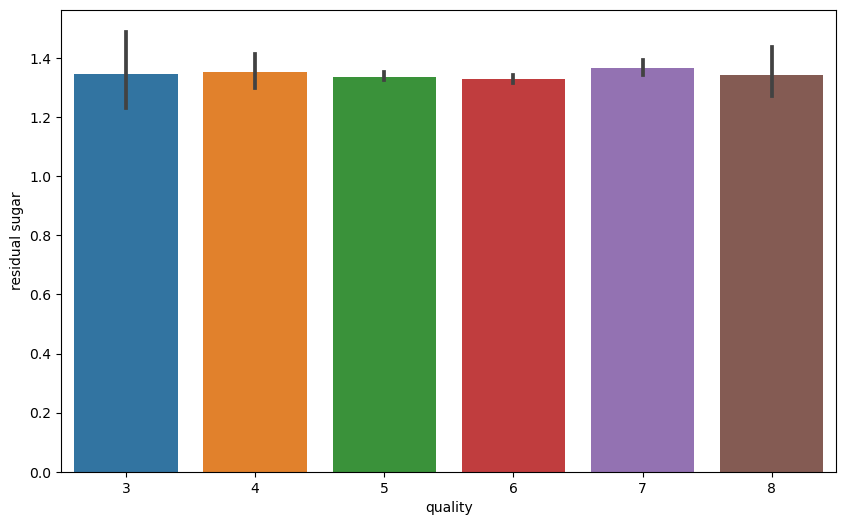

In [23]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

Observation: 
The more residual sugar increases, the quality of wine increases to point from level 1 - 8 and of similar level. This suggests the physiochemical property does not make differences in contribution to wine quality as its level changes.

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

<Axes: xlabel='quality', ylabel='chlorides'>

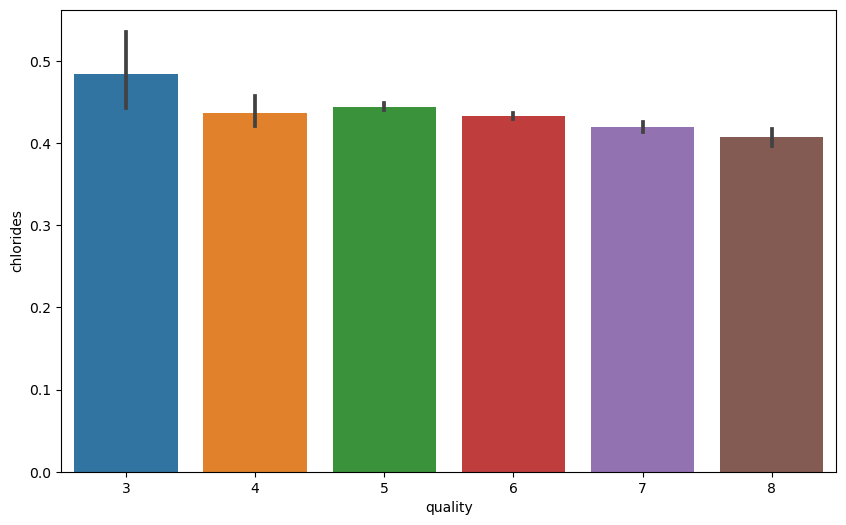

In [24]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

It could be seen that the highest quality of wine(8) is determined at around 75% level of chloride. Any level above that has no contribution to the quality.

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

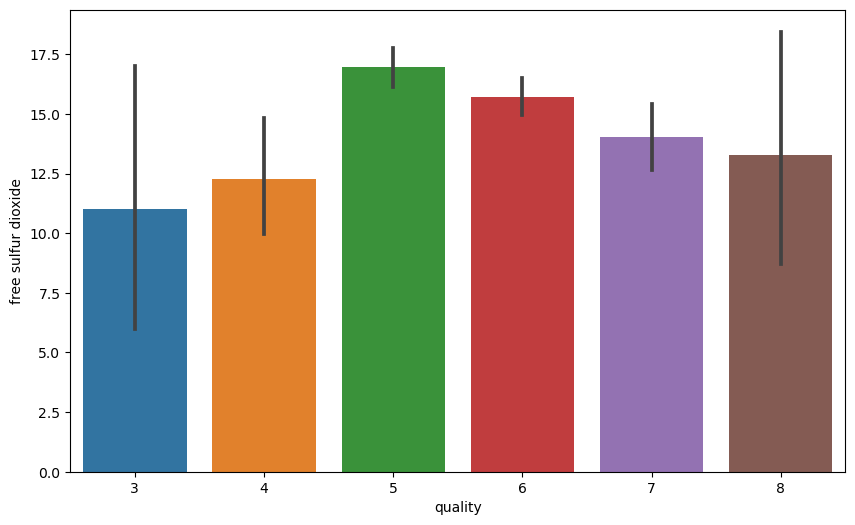

In [25]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

Free sulfurdioxide responds to maximum quality of wine but not proportaional to the increase level but at nearly 60% level, anythinh above show decrease in wine quality.

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

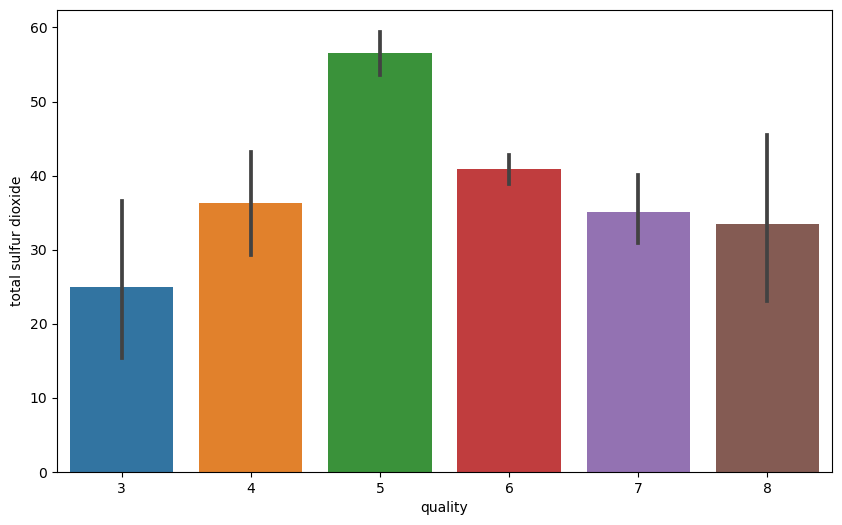

In [26]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

In [ ]:
Total sulfurdioxide takes almost the structure of free sulfuroxide but reduces the quality as its level increases.

<Axes: xlabel='quality', ylabel='density'>

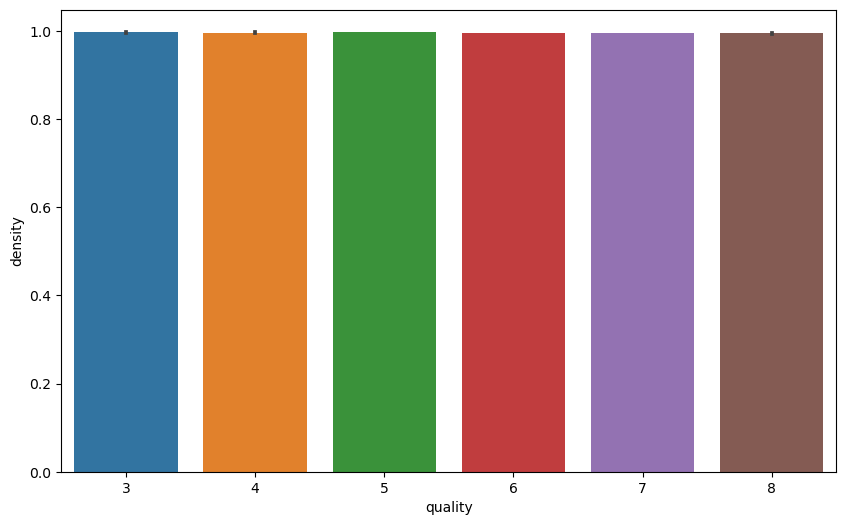

In [27]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

<Axes: xlabel='quality', ylabel='pH'>

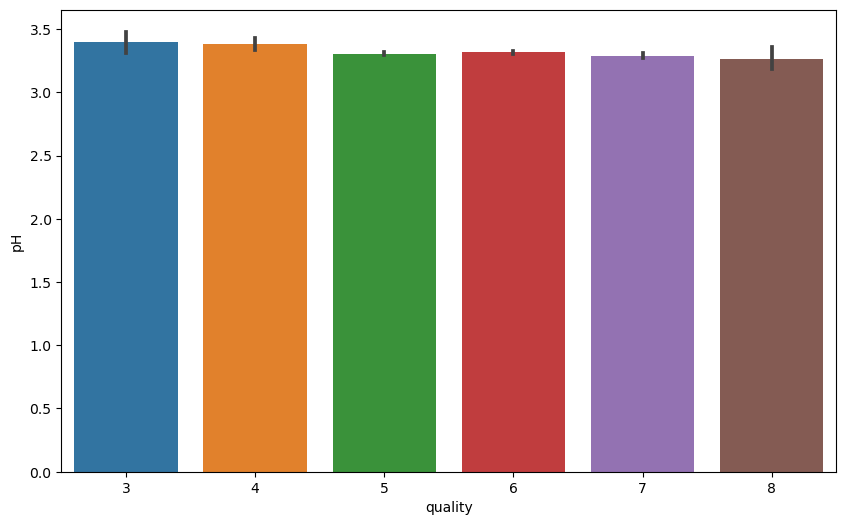

In [28]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

Both density and ph variables have similar effects in determining the quality of wine. inrespective of each level, the wine quality remains the same

<Axes: xlabel='quality', ylabel='sulphates'>

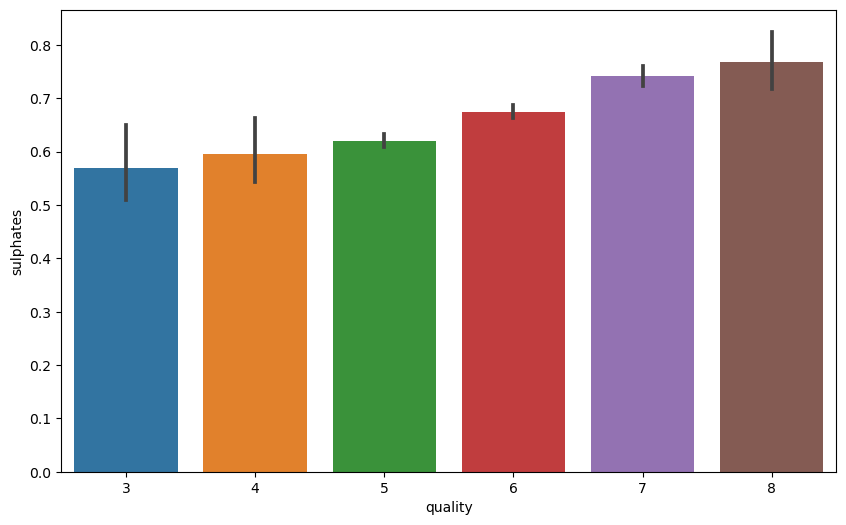

In [29]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

Sulphates reflects the a strong relationship with the quality of wine as its level increases, the wine quality increases to the maximum as seen from the bar plot

<Axes: xlabel='quality', ylabel='alcohol'>

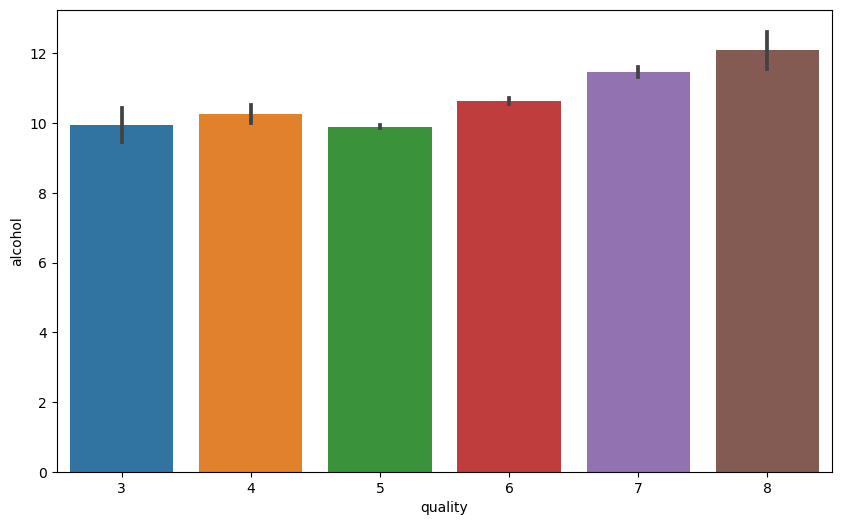

In [30]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

As Sulphates, alcohol too has a strong relationship with the quality of wine as its level increases, the wine quality increases to the maximum as seen from the bar plot

In [31]:
# to determine the correlation among the variables with target(quality)
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.156909,0.149402,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.017826,0.094520,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.165255,0.192801,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.156909,0.017826,0.165255,1.000000,0.093468,0.164081,0.202485,0.401010,-0.091009,0.008899,0.071112,0.020657
chlorides,0.149402,0.094520,0.192801,0.093468,1.000000,0.001990,0.057508,0.303230,-0.282776,0.315637,-0.279034,-0.161767
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.164081,0.001990,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.202485,0.057508,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.401010,0.303230,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.091009,-0.282776,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.008899,0.315637,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [32]:
#Show in ascending order the correlation of variables with target 
corr = df.corr()
corr['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.020657
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.161767
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

The output shows in ascending order, correlation of independent varables with dependent variable(wine quality), it could be observed that alcohol, suphates, citric acid, fixed acidity and residual sugar have positive correlations while others have negative. The positive correlation suggests the level of positive influence ecah variable has in determining the quality of wine.

<Axes: >

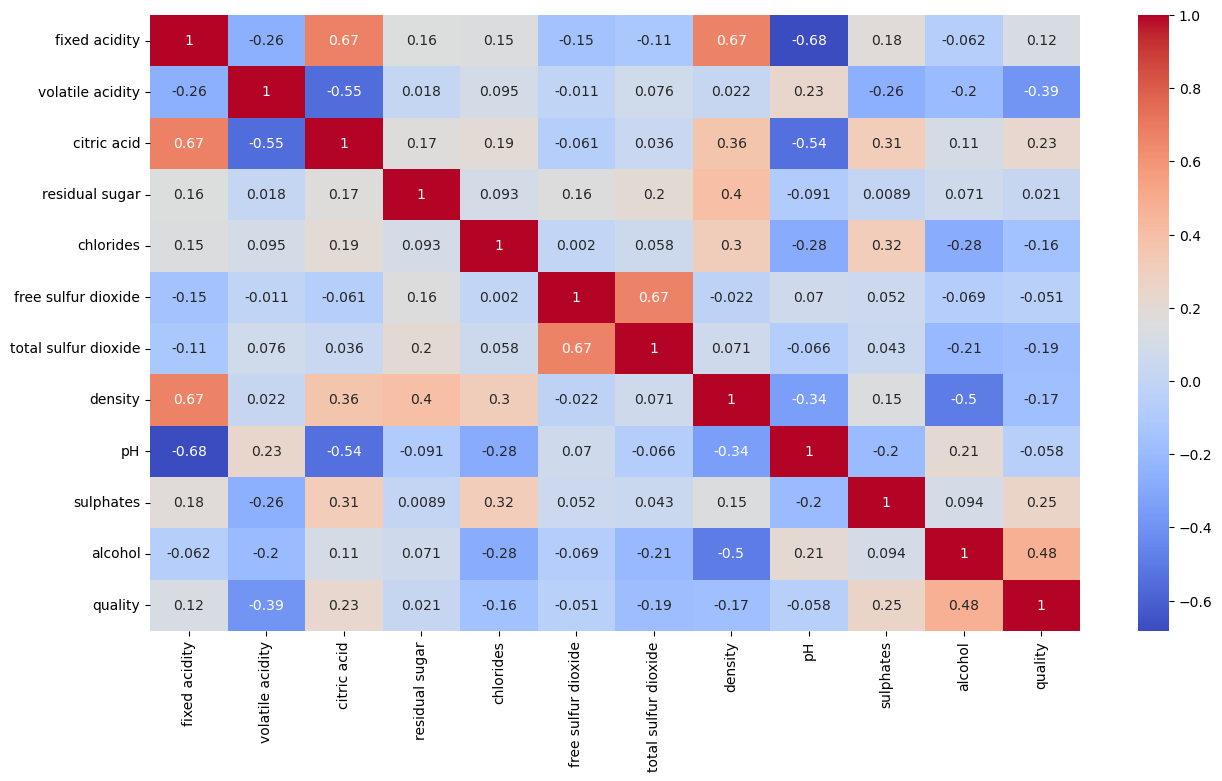

In [33]:
# Visualizing the Correlation Matrix
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')

<Axes: title={'center': 'Correlation with Quality and physiochemical attributes that make a wine good'}>

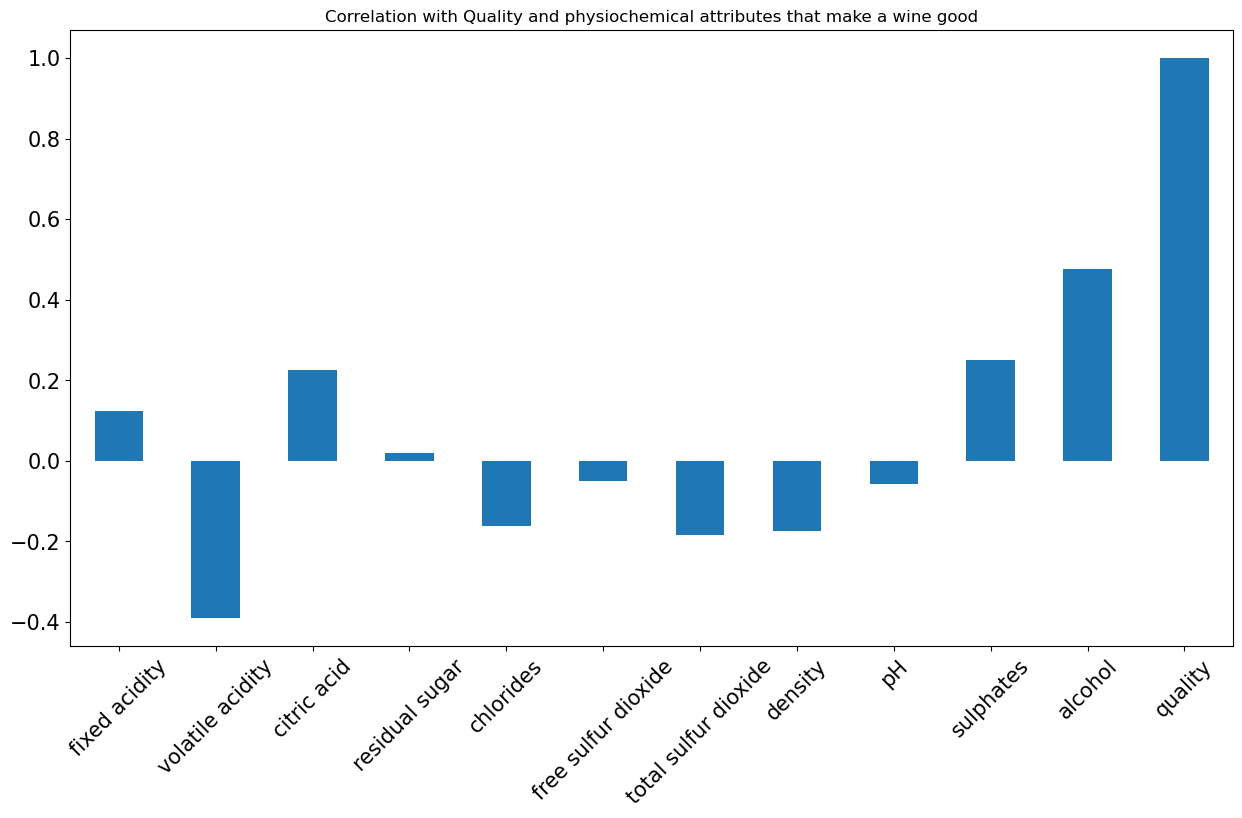

In [34]:
df.corrwith(df.quality).plot.bar(figsize = (15, 8), title = "Correlation with Quality and physiochemical attributes that make a wine good", fontsize = 15, rot = 45, grid = False)

Visualizing Correlation of the variables using barplot
from the correlation analysis, it is observed that some variables need to be removed from the model because of no impact as such with the target. for instance, 
1. free sulfur dioxide
2. pH 
3. chlorides  
4. density
5. volatile acidity

In [35]:
# To input split the variables in X-axis and Y-axis
X = df.drop(columns=['quality'])
y = df['quality']

In [36]:
#To create a column called quality_class
#0 - Not good
#1 - good
# to be splited as follows:
#less than 7  -  0
# 7 and higher - 1
#create an empty column'quality_class'

quality_class = []

df['quality_class'] = np.where(df['quality'] < 7, 0, 1)

In [37]:
# check the new column
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_class'],
      dtype='object')

In [38]:
df['quality_class'].unique()

array([0, 1])

In [39]:
df['quality_class'].value_counts()

0    1382
1     217
Name: quality_class, dtype: int64

In [40]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.238562,0.423582,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,1.375069,0.461044,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,1.320006,0.451436,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.238562,0.421716,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.238562,0.423582,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.216440,0.421716,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.169607,0.410157,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.062659,0.402073,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,1.259921,0.417934,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,1.827160,0.414082,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [41]:
# To split the variables in X-axis and Y-axis - with new column(quality_class)
X = df.drop('quality_class', axis = 1)
y = df['quality_class']

In [42]:
#Spliting the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1279, 12)
Shape of X_test:  (320, 12)
Shape of y_train:  (1279,)
Shape of y_test (320,)


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

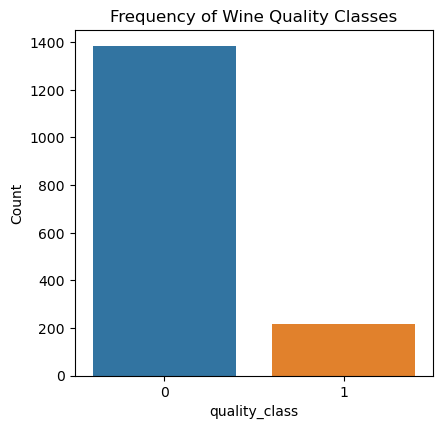

In [45]:
# Plot the count of each quality class
fig = plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.subplot(2, 3, 1)  # Create a subplot in the figure

sns.countplot(data=df, x='quality_class')
plt.title("Frequency of Wine Quality Classes")
plt.ylabel("Count")
plt.xlabel("quality_class")
plt.tight_layout()  # Ensures proper spacing of subplots if you plan to add more in the future
plt.show()

The bar plot shows the distribution of quality (bad or good) of wine within the dataset

In [46]:
#importing the DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on your data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [48]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

AUC Score: 1.0


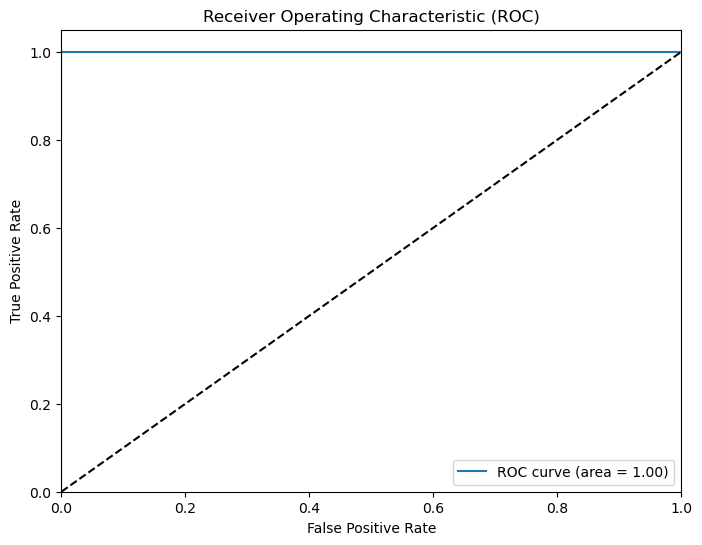

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# y_test and y_pred_prob as defined earlier
auc_score = roc_auc_score(y_test, y_pred_prob)

print("AUC Score:", auc_score)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [50]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [52]:
#print confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[273   0]
 [  0  47]]
100.0


In [53]:
#Saving the model using .pkl
import joblib
joblib.dump(clf, "Predicting wine quality.pkl")

['Predicting wine quality.pkl']

In [54]:
#Predicting the saved model
clf = joblib.load("Predicting wine quality.pkl")

#Prediction
prediction = clf.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [55]:
a = np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["Original"] = a
df

,predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
315,0,0
316,0,0
317,0,0
318,0,0


The prediction with original values are the same, which validates the accuracy of the prediction model used in the analysis.

Conclusion:
a. We can depict from the analysis that four physicochemical (inputs) contribute significantly to the dermination of highest quality of wine, namely:
1. alcohol
2. sulphates
3. citric acid
4. free acidity 
b. The Machine learning model used is perfectly to predict the quality of wine as shown by value of ROC and accuracy value of 100%
c. With reviewing the predicted and original values through the model produces same outputs, which suggests the validity of the model to accurately predict the quality of wine

# End